# Social Network Analysis

### Caso Karate:

In [1]:
#!pip install networkx

In [2]:
# importando librerías
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
import pandas as pd
import numpy as np
import warnings

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [3]:
warnings.filterwarnings('ignore')
pd.options.display.float_format = '{:,.2f}'.format
sns.set_style(style='darkgrid')

**Nodos y Enlaces**:

In [4]:
# Descargando la base, y datos de nodos y enlaces
kn=nx.karate_club_graph()

num_nodes = kn.number_of_nodes()
print('Número de nodos: ' + str(num_nodes))

num_edges = kn.number_of_edges()
print('Número de enlaces: ' + str(num_edges))

Número de nodos: 34
Número de enlaces: 78


**Grafo**:

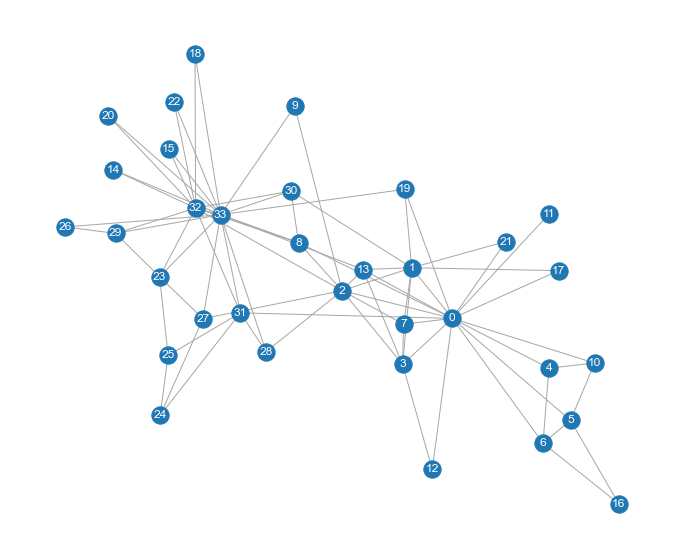

In [5]:
# Visualización del grafo
with sns.axes_style('darkgrid'):
    fig = plt.subplots(1, figsize=(12,10))
    nx.draw_networkx(kn, edge_color='#a7a7a5', with_labels=True, font_color='white')
    plt.axis('off')

**Degree of Centrality**:

In [6]:
deg_cen = {}
graphs=[kn]

for g in graphs:
    deg_cen[g] = nx.degree_centrality(g)

g_1 = pd.DataFrame(deg_cen)
g_1 = g_1.reset_index()
g_1.columns = ['node','degree_centrality']
g_1

,node,degree_centrality
0,0,0.48
1,1,0.27
2,2,0.30
3,3,0.18
4,4,0.09
5,5,0.12
6,6,0.12
7,7,0.12
8,8,0.15
9,9,0.06


**Analizando un nodo en particular**:

In [7]:
num_nodes = graphs[0].number_of_nodes()

print('Número de nodos: ' + str(num_nodes))
list_nodes=list(graphs[0].nodes)

print(list_nodes)
num_neighbors = graphs[0].degree(list_nodes[4])

print('Grado del Nodo ', list_nodes[4], 'es ', num_neighbors )
print('Grados de centrality:', round(num_neighbors/(num_nodes-1),3))

Número de nodos: 34
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]
Grado del Nodo  4 es  3
Grados de centrality: 0.091


**Betweenness Centrality**:

In [8]:
# Número de veces que un nodo actúa como puente a lo largo del camino más corto entre otros dos nodos
betw_cen = {}

for g in graphs:
    betw_cen[g] = nx.betweenness_centrality(g)

g_2 = pd.DataFrame(betw_cen)
g_2 = g_2.reset_index()
g_2.columns = ['node','betweenness_centrality']
g_2

,node,betweenness_centrality
0,0,0.44
1,1,0.05
2,2,0.14
3,3,0.01
4,4,0.00
5,5,0.03
6,6,0.03
7,7,0.00
8,8,0.06
9,9,0.00


**Recorridos más cortos**:

In [9]:
# Camino más corto de 5 hacia todos los nodos
paths = nx.all_pairs_shortest_path(graphs[0])

p_1 = []

for p in paths:
    if p[0]==5:
        p_1.append(p)
        
p_1

[(5,
  {5: [5],
   0: [5, 0],
   6: [5, 6],
   10: [5, 10],
   16: [5, 16],
   1: [5, 0, 1],
   2: [5, 0, 2],
   3: [5, 0, 3],
   4: [5, 0, 4],
   7: [5, 0, 7],
   8: [5, 0, 8],
   11: [5, 0, 11],
   12: [5, 0, 12],
   13: [5, 0, 13],
   17: [5, 0, 17],
   19: [5, 0, 19],
   21: [5, 0, 21],
   31: [5, 0, 31],
   30: [5, 0, 1, 30],
   9: [5, 0, 2, 9],
   27: [5, 0, 2, 27],
   28: [5, 0, 2, 28],
   32: [5, 0, 2, 32],
   33: [5, 0, 8, 33],
   24: [5, 0, 31, 24],
   25: [5, 0, 31, 25],
   23: [5, 0, 2, 27, 23],
   14: [5, 0, 2, 32, 14],
   15: [5, 0, 2, 32, 15],
   18: [5, 0, 2, 32, 18],
   20: [5, 0, 2, 32, 20],
   22: [5, 0, 2, 32, 22],
   29: [5, 0, 2, 32, 29],
   26: [5, 0, 8, 33, 26]})]

In [10]:
# Camino más corto de 5 hacia "destino"
destino = 14

path_5 = nx.all_shortest_paths(graphs[0],5,destino)

for p in path_5:
    print(p)

[5, 0, 2, 32, 14]
[5, 0, 8, 32, 14]
[5, 0, 31, 32, 14]
[5, 0, 8, 33, 14]
[5, 0, 13, 33, 14]
[5, 0, 19, 33, 14]
[5, 0, 31, 33, 14]


**Closeness Centrality**:

In [11]:
# Longitud promedio de la ruta más corta entre el nodo y todos los demás nodos en el gráfico
clo_cen = {}

for g in graphs:
    clo_cen[g] = nx.closeness_centrality(g)

g_3 = pd.DataFrame(clo_cen)
g_3 = g_3.reset_index()
g_3.columns = ['node','closeness_centrality']
g_3

,node,closeness_centrality
0,0,0.57
1,1,0.49
2,2,0.56
3,3,0.46
4,4,0.38
5,5,0.38
6,6,0.38
7,7,0.44
8,8,0.52
9,9,0.43


**Eigen Vector Centrality**:

In [12]:
# Responde qué tan importante es un nodo dentro de la red social
eig_cen = {}
for g in graphs:
    eig_cen[g] = nx.eigenvector_centrality(g)

g_4 = pd.DataFrame(eig_cen)
g_4 = g_4.reset_index()
g_4.columns = ['node','eigenvector_centrality']
g_4

,node,eigenvector_centrality
0,0,0.36
1,1,0.27
2,2,0.32
3,3,0.21
4,4,0.08
5,5,0.08
6,6,0.08
7,7,0.17
8,8,0.23
9,9,0.10


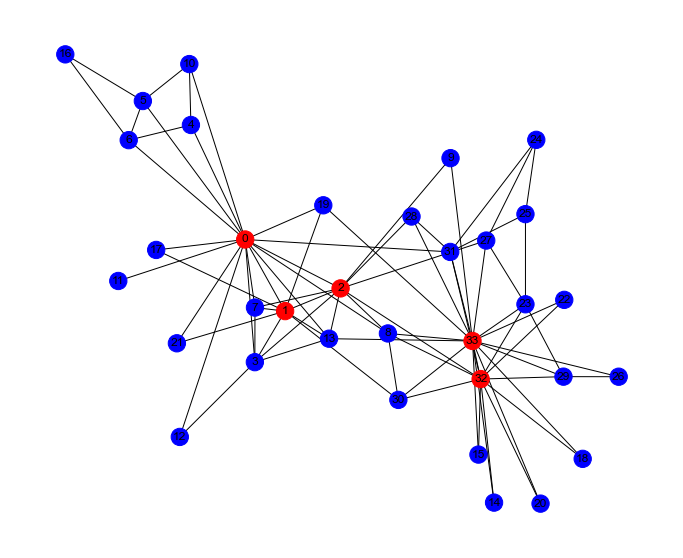

In [13]:
graph2 = kn
color = []
fig = plt.subplots(1, figsize=(12,10))

for node in graph2:
    if (node == 33 or node == 0 or node == 32 or node==2 or node==1):
        color.append('red')
    else:
        color.append('blue')
        
nx.draw_spring(graph2,node_color=color,with_labels=True)

**K-Means+SNA**:

In [18]:
# Pre-processing
G_p1=graphs[0]
A=nx.adjacency_matrix(G_p1)
L = nx.laplacian_matrix(G_p1).astype(float)

In [20]:
import scipy as sp
w,v = sp.sparse.linalg.eigsh(L, k = 3, which='SM')

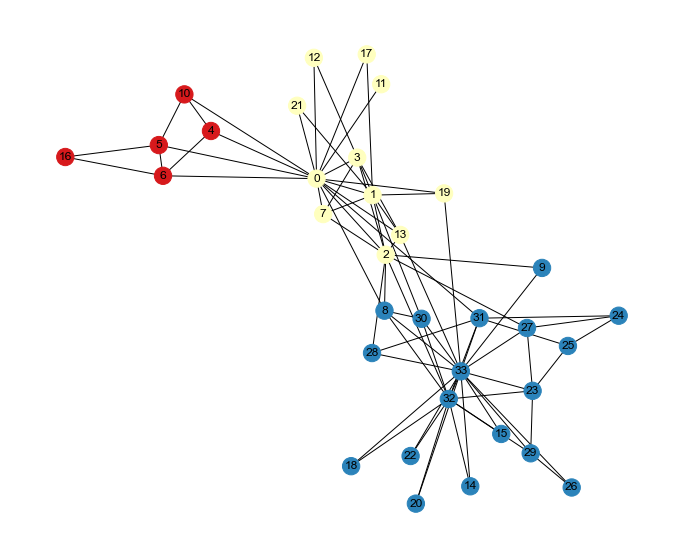

In [21]:
from sklearn.cluster import KMeans
X = v*w

kmeans = KMeans(init='k-means++', n_clusters=3, n_init=10)
kmeans.fit_predict(X)

centroids = kmeans.cluster_centers_
labels = kmeans.labels_
error = kmeans.inertia_

fig = plt.subplots(1, figsize=(12,10))

colors = ['#d7191c', '#ffffbf', '#2b83ba']

node_colors = [ colors[labels[v]] for v in G_p1.nodes()]

nx.draw(G_p1, node_color=node_colors, with_labels='True')